In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from tqdm import tqdm
from flaml import AutoML

ModuleNotFoundError: No module named 'numpy'

In [2]:
clinical_train = pd.read_csv('train_clinical_data.csv')
clinical_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2615 entries, 0 to 2614
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             2615 non-null   object 
 1   patient_id                           2615 non-null   int64  
 2   visit_month                          2615 non-null   int64  
 3   updrs_1                              2614 non-null   float64
 4   updrs_2                              2613 non-null   float64
 5   updrs_3                              2590 non-null   float64
 6   updrs_4                              1577 non-null   float64
 7   upd23b_clinical_state_on_medication  1288 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 163.6+ KB


In [3]:
clinical_train.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On


In [4]:
clinical_train['visit_id'].nunique()

2615

In [5]:
peptides = pd.read_csv('train_peptides.csv') 
peptides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981834 entries, 0 to 981833
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   visit_id          981834 non-null  object 
 1   visit_month       981834 non-null  int64  
 2   patient_id        981834 non-null  int64  
 3   UniProt           981834 non-null  object 
 4   Peptide           981834 non-null  object 
 5   PeptideAbundance  981834 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 44.9+ MB


In [6]:
peptides.head()

,visit_id,visit_month,patient_id,UniProt,Peptide,PeptideAbundance
0,55_0,0,55,O00391,NEQEQPLGQWHLS,11254.3
1,55_0,0,55,O00533,GNPEPTFSWTK,102060.0
2,55_0,0,55,O00533,IEIPSSVQQVPTIIK,174185.0
3,55_0,0,55,O00533,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,27278.9
4,55_0,0,55,O00533,SMEQNGPGLEYR,30838.7


In [7]:
proteins = pd.read_csv('train_proteins.csv')
proteins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232741 entries, 0 to 232740
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   visit_id     232741 non-null  object 
 1   visit_month  232741 non-null  int64  
 2   patient_id   232741 non-null  int64  
 3   UniProt      232741 non-null  object 
 4   NPX          232741 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 8.9+ MB


In [8]:
proteins.head()

,visit_id,visit_month,patient_id,UniProt,NPX
0,55_0,0,55,O00391,11254.3
1,55_0,0,55,O00533,732430.0
2,55_0,0,55,O00584,39585.8
3,55_0,0,55,O14498,41526.9
4,55_0,0,55,O14773,31238.0


In [9]:
proteins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232741 entries, 0 to 232740
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   visit_id     232741 non-null  object 
 1   visit_month  232741 non-null  int64  
 2   patient_id   232741 non-null  int64  
 3   UniProt      232741 non-null  object 
 4   NPX          232741 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 8.9+ MB


In [10]:
proteins['UniProt'].nunique()

227

In [11]:
proteins['visit_month'].nunique()

15

In [12]:
proteins['UniProt'].nunique()

227

In [13]:
sup_clinical = pd.read_csv('supplemental_clinical_data.csv')
sup_clinical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   visit_id                             2223 non-null   object 
 1   patient_id                           2223 non-null   int64  
 2   visit_month                          2223 non-null   int64  
 3   updrs_1                              2010 non-null   float64
 4   updrs_2                              2009 non-null   float64
 5   updrs_3                              2218 non-null   float64
 6   updrs_4                              1295 non-null   float64
 7   upd23b_clinical_state_on_medication  1122 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 139.1+ KB


In [14]:
sup_clinical.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,35_0,35,0,5.0,3.0,16.0,0.0,NaN
1,35_36,35,36,6.0,4.0,20.0,0.0,NaN
2,75_0,75,0,4.0,6.0,26.0,0.0,NaN
3,75_36,75,36,1.0,8.0,38.0,0.0,On
4,155_0,155,0,NaN,NaN,0.0,NaN,NaN


## Checking for Null Values

In [15]:
clinical_train.isnull().sum()

visit_id                                  0
patient_id                                0
visit_month                               0
updrs_1                                   1
updrs_2                                   2
updrs_3                                  25
updrs_4                                1038
upd23b_clinical_state_on_medication    1327
dtype: int64

In [16]:
peptides.isnull().sum()

visit_id            0
visit_month         0
patient_id          0
UniProt             0
Peptide             0
PeptideAbundance    0
dtype: int64

In [17]:
proteins.isnull().sum()

visit_id       0
visit_month    0
patient_id     0
UniProt        0
NPX            0
dtype: int64

In [18]:
sup_clinical.isnull().sum()

visit_id                                  0
patient_id                                0
visit_month                               0
updrs_1                                 213
updrs_2                                 214
updrs_3                                   5
updrs_4                                 928
upd23b_clinical_state_on_medication    1101
dtype: int64

## Data Pre Processing

In [19]:
updrs_details = pd.concat([clinical_train, sup_clinical])

print(f"Clinical Train dataset unique patient id count: {clinical_train['patient_id'].nunique()}")
print(f"Suplement Clinical dataset unique patient id count: {sup_clinical['patient_id'].nunique()}")
print(f"New Train dataset unique patient id count: {updrs_details['patient_id'].nunique()}")

Clinical Train dataset unique patient id count: 248
Suplement Clinical dataset unique patient id count: 771
New Train dataset unique patient id count: 1019


In [20]:
updrs_details['patient_id'].isnull().sum()

0

In [21]:
updrs_details.head()

,visit_id,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,upd23b_clinical_state_on_medication
0,55_0,55,0,10.0,6.0,15.0,NaN,NaN
1,55_3,55,3,10.0,7.0,25.0,NaN,NaN
2,55_6,55,6,8.0,10.0,34.0,NaN,NaN
3,55_9,55,9,8.0,9.0,30.0,0.0,On
4,55_12,55,12,10.0,10.0,41.0,0.0,On


In [22]:
peptides['patient_id'].nunique()

248

## Observation

There is no point in merging supplement clinical data to the training dataset as there is no information about the other patients in peptides and proteins.

Hence, we are proceeding to merge clinical_training, peptides and proteins dataset. 


In [23]:
proteins_names = proteins['UniProt'].unique()

proteins_names

array(['O00391', 'O00533', 'O00584', 'O14498', 'O14773', 'O14791',
       'O15240', 'O15394', 'O43505', 'O60888', 'O75144', 'O75326',
       'O94919', 'P00441', 'P00450', 'P00734', 'P00736', 'P00738',
       'P00746', 'P00747', 'P00748', 'P00751', 'P01008', 'P01009',
       'P01011', 'P01019', 'P01023', 'P01024', 'P01031', 'P01033',
       'P01034', 'P01042', 'P01344', 'P01591', 'P01608', 'P01621',
       'P01717', 'P01780', 'P01833', 'P01834', 'P01857', 'P01859',
       'P01860', 'P01861', 'P01876', 'P01877', 'P02452', 'P02647',
       'P02649', 'P02652', 'P02655', 'P02656', 'P02671', 'P02675',
       'P02679', 'P02747', 'P02748', 'P02749', 'P02750', 'P02751',
       'P02753', 'P02760', 'P02763', 'P02765', 'P02766', 'P02768',
       'P02774', 'P02787', 'P02790', 'P04004', 'P04075', 'P04156',
       'P04180', 'P04196', 'P04207', 'P04211', 'P04216', 'P04217',
       'P04275', 'P04406', 'P04433', 'P05060', 'P05067', 'P05090',
       'P05155', 'P05156', 'P05408', 'P05452', 'P05546', 'P063

In [24]:
len(proteins_names)

227

## Data Augmentation

We are augmenting a new dataset of proteins and peptides using the protein and peptides as their feature names and in each cell we are assigning the values of NPX and Peptides abundance respectively.

In [25]:
def dataframe_dict(df, cols, column_name, column_value, index= 'visit_id'):
    data_dict = dict()
    data_dict[index] = []

    for element in cols:
        data_dict[element] = []


    for visit_id in tqdm(df[index].unique(), desc= "Loading...", ascii= False, ncols= 75):
        data_dict[index].append(visit_id)
        for element in cols:
            if element in df[df[index] == visit_id][column_name].unique():
                data_dict[element].append(df[(df[index] == visit_id) & 
                                                   (df[column_name] == element)][column_value].to_numpy()[0])
            else:
                data_dict[element].append(np.NaN)
                
    print("Task Completed.")
                
    return data_dict

protein_data = dataframe_dict(proteins, proteins_names, 'UniProt', 'NPX')

protein_df = pd.DataFrame(protein_data)

protein_df

protein_df.isnull().sum()

peptide_data = dataframe_dict(peptides, peptides['Peptide'].unique(), 
                    'Peptide', 'PeptideAbundance')

peptide_df = pd.DataFrame(peptide_data)

peptide_df

peptide_df.isnull().sum()

protein_df.to_csv('train_proteins_1.csv')

peptide_df.to_csv('train_peptides_1.csv')

In [26]:
protein_df = pd.read_csv('train_proteins_1.csv')
peptides_df = pd.read_csv('train_peptides_1.csv')

In [27]:
protein_df.drop(columns= ['Unnamed: 0'], inplace= True)

In [28]:
protein_df

,visit_id,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,...,Q9Y646,Q9Y6R7,P01594,P02792,P32754,P60174,Q13449,Q99683,Q99829,Q9UKV8
0,55_0,11254.3,732430.0,39585.8,41526.9,31238.00,4202.71,177775.0,62898.2,333376.0,...,23833.70,18953.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1517_0,11648.9,419015.0,35053.8,NaN,17466.30,2784.40,118752.0,40274.9,166322.0,...,19771.60,14699.50,18356.40,25826.9,124675.0,18494.30,32892.8,90539.1,11373.40,55379.8
2,1923_0,21361.8,866985.0,32035.1,NaN,13373.10,NaN,269106.0,81580.2,315740.0,...,26346.20,23597.10,NaN,27842.6,75856.4,12385.70,22141.7,93929.3,12141.10,64302.3
3,2660_0,NaN,579829.0,28259.8,29883.2,19134.10,1884.61,134409.0,70664.8,213295.0,...,25630.00,17990.90,10813.80,NaN,103346.0,14354.80,29919.2,86771.8,NaN,55047.2
4,3636_0,10887.0,267402.0,11390.4,15696.3,6646.16,2962.85,61555.3,25927.8,72635.7,...,7985.07,8587.01,NaN,NaN,NaN,NaN,20737.9,77076.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,58648_96,NaN,333580.0,30430.4,25850.7,12475.80,2201.56,108198.0,NaN,140745.0,...,20459.30,18764.10,NaN,20421.4,95941.8,15111.10,23943.2,83223.2,NaN,107253.0
1109,5645_108,10833.7,478871.0,36319.6,25384.2,44735.60,NaN,130582.0,65798.2,226207.0,...,35301.40,15627.10,NaN,22532.6,49602.0,13260.50,21835.7,112181.0,4834.62,43025.5
1110,12703_108,13231.2,869905.0,36491.3,26506.5,16815.50,1206.07,251486.0,79855.4,155299.0,...,23710.20,13366.70,6157.04,17132.5,NaN,9417.38,26237.5,79705.9,18307.10,33346.9
1111,55096_108,NaN,251652.0,25899.0,22491.2,22933.10,3480.20,90834.2,35794.8,150723.0,...,14165.30,NaN,12313.60,15335.2,71745.5,NaN,15534.2,113332.0,22182.90,101061.0


In [29]:
protein_df.isnull().sum()

visit_id      0
O00391      349
O00533        1
O00584       13
O14498       81
           ... 
P60174      384
Q13449      204
Q99683      180
Q99829      624
Q9UKV8      206
Length: 228, dtype: int64

In [30]:
peptides_df.drop(columns= ['Unnamed: 0'], inplace= True)

In [31]:
peptides_df.head()

,visit_id,NEQEQPLGQWHLS,GNPEPTFSWTK,IEIPSSVQQVPTIIK,KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK,SMEQNGPGLEYR,TLKIENVSYQDKGNYR,VIAVNEVGR,VMTPAVYAPYDVK,VNGSPVDNHPFAGDVVFPR,...,QALPQVR,SGNIPAGTTVDTK,RLGMFNIQHC(UniMod_4)K,EPQVYTLPPSRDELTK,PALEDLR,QKVEPLRAELQEGAR,RTHLPEVFLSK,INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK,EQPPSLTR,AGC(UniMod_4)VAESTAVC(UniMod_4)R
0,55_0,11254.3,102060.0,174185.0,27278.9,30838.7,23216.5,170878.0,148771.0,55202.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1517_0,11648.9,63593.4,99566.6,16351.0,15566.0,NaN,81148.1,110232.0,32558.1,...,11373.4,55379.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1923_0,21361.8,143149.0,183035.0,40231.7,45931.1,35114.2,167041.0,187488.0,64994.3,...,12141.1,64302.3,527285.0,266736.0,52150.0,2907160.0,63.3693,566170.0,NaN,NaN
3,2660_0,NaN,62913.2,202217.0,32707.7,27432.2,21862.0,102178.0,78590.6,51928.6,...,NaN,55047.2,698890.0,NaN,26555.1,1647180.0,95.9112,333201.0,16940.5,5493.0
4,3636_0,10887.0,NaN,93625.6,16141.5,12494.2,11672.1,54660.2,56945.5,21862.3,...,NaN,NaN,578196.0,383650.0,37523.8,2398190.0,90.5350,287937.0,15091.1,NaN


In [32]:
peptides_df.isnull().sum()

visit_id                                      0
NEQEQPLGQWHLS                               349
GNPEPTFSWTK                                  83
IEIPSSVQQVPTIIK                              65
KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK       47
                                           ... 
QKVEPLRAELQEGAR                              30
RTHLPEVFLSK                                 112
INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK     96
EQPPSLTR                                    339
AGC(UniMod_4)VAESTAVC(UniMod_4)R            454
Length: 969, dtype: int64

In [33]:
protein_df.shape

(1113, 228)

In [34]:
peptides_df.shape

(1113, 969)

## Data Cleaning

In [35]:
def cleaning(df):
    for feature in df.columns:
        median = df[feature].median()
        
        df.fillna(median, inplace= True)
    

In [36]:
cleaning(protein_df)

In [37]:
cleaning(peptides_df)

In [38]:
protein_df.isin([np.inf, -np.inf]).sum()

visit_id    0
O00391      0
O00533      0
O00584      0
O14498      0
           ..
P60174      0
Q13449      0
Q99683      0
Q99829      0
Q9UKV8      0
Length: 228, dtype: int64

In [39]:
protein_df.isnull().sum()

visit_id    0
O00391      0
O00533      0
O00584      0
O14498      0
           ..
P60174      0
Q13449      0
Q99683      0
Q99829      0
Q9UKV8      0
Length: 228, dtype: int64

In [40]:
for feature in protein_df.columns:
    if protein_df[feature].isnull().sum() < 0:
        print(feature)
        break
else:
    print("All clear.")

All clear.


In [41]:
peptides_df.isnull().sum()

visit_id                                    0
NEQEQPLGQWHLS                               0
GNPEPTFSWTK                                 0
IEIPSSVQQVPTIIK                             0
KPQSAVYSTGSNGILLC(UniMod_4)EAEGEPQPTIK      0
                                           ..
QKVEPLRAELQEGAR                             0
RTHLPEVFLSK                                 0
INHC(UniMod_4)RFDEFFSEGC(UniMod_4)APGSKK    0
EQPPSLTR                                    0
AGC(UniMod_4)VAESTAVC(UniMod_4)R            0
Length: 969, dtype: int64

## Data Cleaned

We have cleaned the data by replacing the null values with mean of each feature.

## Feature Selection

After finishing with the data augmentation, we are now going to select the best feature out of the each dataset to reduce the dimensionality and get off from the dimensionality curse.

We are going to use PCA (Principal Component Analysis)

In [42]:
def scree_plot(df):
    X = df.iloc[:, 1:]
    X_scaled = StandardScaler().fit_transform(X)

    pca = PCA()

    # Fit the PCA model on the data
    pca.fit(X_scaled)

    # Plot the scree plot
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('Number of components')
    plt.ylabel('Cumulative explained variance')
    plt.show()

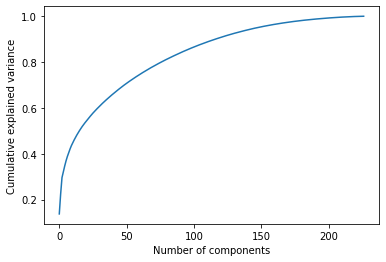

In [43]:
scree_plot(protein_df)

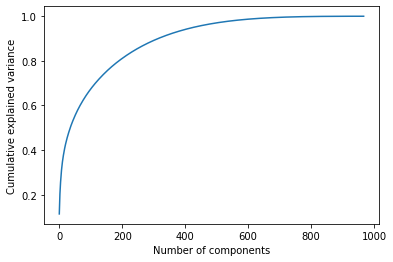

In [44]:
scree_plot(peptides_df)

## Observation

According to the scree plot analysis to find the optimal points for number of components of PCA,

1. Proteins dataset has an optimal point ranging from (40, 100)
2. Peptides dataset has an optimal point ranging from (175, 300)

## Applying PCA

We are going to apply PCA on the dataset using 70 as number of components for proteins and 237 as number of components for peptides

In [45]:
def pca_transform_dataset(n, df):
    pca = PCA(n_components= n)

    pca.fit(df.iloc[:, 1:])

    array_pca = pca.transform(df.iloc[:, 1:])
    
    column_name = []
    for i in range(1, n + 1):
        column_name.append('PC' + str(i))

    df_pca = pd.DataFrame(array_pca, columns= column_name)
    return df_pca

In [46]:
protein_df_pca = pca_transform_dataset(70, protein_df)

protein_df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70
0,8.027150e+07,-1.939879e+06,6.336629e+06,-1.781978e+07,-1.323907e+07,4.608459e+06,-2.321191e+05,1.897086e+06,1.239499e+06,1.630050e+05,...,7.449506e+04,-1.506295e+06,-5.949106e+05,3.494892e+05,3.721924e+05,2.110907e+04,689309.089468,-264636.534129,411306.938644,-40034.620941
1,5.571938e+06,-2.957457e+06,6.271511e+05,3.923613e+06,-3.274423e+06,-3.785756e+06,2.873085e+06,1.996551e+06,-3.663547e+05,-2.234153e+05,...,1.717093e+06,-1.068634e+05,-2.634206e+05,-5.281639e+05,-5.086049e+05,-2.924722e+05,86929.427430,184271.441289,654222.538410,771374.888109
2,1.740343e+06,4.243594e+07,3.416555e+05,1.835689e+06,1.126356e+06,3.510541e+06,-4.918718e+06,-1.654149e+06,-1.523013e+06,-1.755779e+06,...,3.220649e+05,1.593370e+05,4.993599e+05,1.677543e+03,3.147252e+05,-1.155594e+06,578993.233465,-193298.270063,365195.178254,649706.516736
3,-8.625923e+07,1.589226e+07,-2.232185e+06,-1.672170e+06,-1.970571e+06,-2.343552e+05,-7.671305e+05,3.411754e+05,2.315255e+06,-1.284707e+06,...,-1.339501e+05,-3.070975e+05,-4.910247e+05,-2.896802e+05,7.798871e+05,-1.573568e+05,66797.964246,172964.218673,-404904.723719,352939.439381
4,-6.111673e+07,-1.524359e+07,-8.699567e+06,5.021034e+06,-4.149064e+06,1.445267e+06,2.170733e+06,2.910561e+06,-4.475339e+06,-1.428433e+06,...,-4.847967e+05,-5.667873e+05,-4.974100e+05,1.696179e+05,-6.211333e+05,-1.722849e+06,-133570.944147,-339247.110560,313219.701976,625042.423034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,-5.024049e+07,3.834535e+05,2.927066e+06,8.676239e+06,-3.845381e+06,1.507362e+06,-6.578842e+04,-2.979547e+06,-1.123993e+06,2.003677e+06,...,2.417089e+05,6.383705e+05,-5.414593e+05,1.856492e+05,-1.193731e+06,2.876162e+05,-84397.436944,285946.385407,189842.276032,88951.405265
1109,7.605694e+07,7.885201e+06,1.229140e+07,1.333054e+06,-2.857531e+06,-1.610936e+06,2.940444e+06,1.235243e+06,2.927406e+04,2.314317e+06,...,4.322343e+05,-4.047294e+05,4.375519e+05,4.096576e+05,8.451442e+05,-4.343410e+05,-143894.928552,-119956.244408,-978360.199002,115732.358403
1110,-9.849008e+07,3.652343e+07,-7.731543e+06,1.507377e+06,-4.154540e+06,-2.203240e+06,6.055783e+06,-3.243610e+06,-2.715035e+04,1.280962e+06,...,-1.788707e+05,1.171211e+06,-4.886447e+05,1.211229e+06,-3.543527e+05,1.052480e+05,212630.510793,706005.461046,-445127.938139,-362424.228021
1111,3.109085e+07,-4.543799e+06,-1.790387e+06,8.841266e+06,-7.077772e+05,5.263671e+06,-1.564708e+06,-1.986229e+06,-1.338159e+06,-2.206178e+06,...,6.200576e+05,1.090412e+06,-1.088093e+06,-1.345330e+05,5.170302e+05,6.307893e+05,-226547.013844,-317277.972691,8782.421447,130014.884319


In [47]:
peptides_df_pca = pca_transform_dataset(237, peptides_df)

peptides_df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC228,PC229,PC230,PC231,PC232,PC233,PC234,PC235,PC236,PC237
0,3.270287e+07,1.505427e+06,-3.786789e+06,-4.902679e+06,8.715342e+06,8.146117e+06,-9.910649e+06,-1.195629e+07,2.763187e+06,5.328934e+05,...,3.729373e+05,-254081.101259,-322860.089543,3.657218e+05,441967.434862,359963.235702,-252699.099028,-284311.640975,72786.569896,337119.266195
1,-6.972174e+06,4.410830e+06,7.427038e+06,-1.019053e+07,2.121200e+06,-9.420140e+04,4.256858e+06,-8.235879e+05,6.627965e+05,-1.330223e+06,...,-1.787322e+05,-249591.265203,637555.781502,-1.007678e+05,-482575.025597,-901754.079841,-515780.652750,306224.901424,5468.577130,270042.782079
2,3.445451e+06,2.166071e+07,-8.299710e+06,7.867461e+06,1.879082e+06,7.869701e+05,9.527110e+05,3.197895e+06,-2.820685e+05,1.053967e+06,...,9.659123e+04,844371.565506,144337.125231,1.097658e+06,-491589.426434,566967.769872,-838163.397422,290375.515155,259754.924157,154184.244063
3,-2.241325e+07,3.929500e+06,-9.898616e+06,-2.609115e+05,-1.310692e+05,-4.390932e+05,9.588243e+05,-2.801049e+06,8.908782e+05,-3.071702e+06,...,-8.236682e+04,838709.702758,-274722.638627,-1.376731e+04,-75225.704981,-75549.469256,661375.373119,-351537.638761,-643976.960417,46654.795334
4,-1.561379e+07,-1.132043e+07,-4.589225e+06,-6.897873e+06,-3.214796e+06,4.511850e+06,2.456708e+06,7.928385e+05,-6.683184e+06,1.093126e+06,...,-2.995161e+04,184293.227155,-264668.028297,-5.618957e+05,-239402.297217,79245.193308,-298035.575268,-943617.263651,-54968.792354,-657115.536173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,-1.931734e+07,9.189158e+05,-2.449765e+06,-1.033902e+07,1.954688e+06,5.486061e+05,1.622388e+06,1.106109e+06,5.506111e+06,-4.413238e+06,...,-1.188916e+06,-699161.991304,-137332.027305,-5.035694e+05,-240537.179755,-246036.429666,395909.161816,-463672.063719,200007.574872,-205444.264544
1109,2.231016e+07,7.187799e+06,-3.578588e+04,1.963794e+06,3.922263e+06,-6.414693e+05,-1.025888e+06,2.401967e+06,1.294708e+06,5.681653e+06,...,-3.966543e+05,-243206.937192,583658.537804,-9.506751e+03,-432024.847777,-186963.510306,-88375.476966,-326551.945746,-72143.139383,293846.441416
1110,-2.766999e+07,1.739898e+07,-1.469386e+07,7.190556e+06,-5.321609e+06,-9.631394e+05,5.647510e+06,-4.920563e+06,4.249258e+06,-3.848533e+06,...,-5.417339e+05,-56774.310559,-277355.224553,4.928501e+04,-249955.450364,69111.621308,-90677.693673,-124.100067,823522.022808,-295484.530323
1111,-1.751469e+06,1.312644e+06,5.377634e+06,-3.068498e+06,-6.289162e+06,-1.884015e+06,4.908412e+06,1.571906e+06,-2.552948e+06,3.727163e+06,...,6.873248e+05,-689669.587381,-106301.538716,-2.669552e+04,-31424.898687,-322441.125573,-62734.808200,52218.538862,-513664.007804,115494.071915


## Data Integration

In [48]:
protein_df_pca['visit_id'] = protein_df['visit_id']

column_name = ['visit_id']

for i in range(1, 71):
    column_name.append('PC' + str(i))

protein_df_pca = protein_df_pca.loc[:, column_name]
protein_df_pca

,visit_id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68,PC69,PC70
0,55_0,8.027150e+07,-1.939879e+06,6.336629e+06,-1.781978e+07,-1.323907e+07,4.608459e+06,-2.321191e+05,1.897086e+06,1.239499e+06,...,7.449506e+04,-1.506295e+06,-5.949106e+05,3.494892e+05,3.721924e+05,2.110907e+04,689309.089468,-264636.534129,411306.938644,-40034.620941
1,1517_0,5.571938e+06,-2.957457e+06,6.271511e+05,3.923613e+06,-3.274423e+06,-3.785756e+06,2.873085e+06,1.996551e+06,-3.663547e+05,...,1.717093e+06,-1.068634e+05,-2.634206e+05,-5.281639e+05,-5.086049e+05,-2.924722e+05,86929.427430,184271.441289,654222.538410,771374.888109
2,1923_0,1.740343e+06,4.243594e+07,3.416555e+05,1.835689e+06,1.126356e+06,3.510541e+06,-4.918718e+06,-1.654149e+06,-1.523013e+06,...,3.220649e+05,1.593370e+05,4.993599e+05,1.677543e+03,3.147252e+05,-1.155594e+06,578993.233465,-193298.270063,365195.178254,649706.516736
3,2660_0,-8.625923e+07,1.589226e+07,-2.232185e+06,-1.672170e+06,-1.970571e+06,-2.343552e+05,-7.671305e+05,3.411754e+05,2.315255e+06,...,-1.339501e+05,-3.070975e+05,-4.910247e+05,-2.896802e+05,7.798871e+05,-1.573568e+05,66797.964246,172964.218673,-404904.723719,352939.439381
4,3636_0,-6.111673e+07,-1.524359e+07,-8.699567e+06,5.021034e+06,-4.149064e+06,1.445267e+06,2.170733e+06,2.910561e+06,-4.475339e+06,...,-4.847967e+05,-5.667873e+05,-4.974100e+05,1.696179e+05,-6.211333e+05,-1.722849e+06,-133570.944147,-339247.110560,313219.701976,625042.423034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,58648_96,-5.024049e+07,3.834535e+05,2.927066e+06,8.676239e+06,-3.845381e+06,1.507362e+06,-6.578842e+04,-2.979547e+06,-1.123993e+06,...,2.417089e+05,6.383705e+05,-5.414593e+05,1.856492e+05,-1.193731e+06,2.876162e+05,-84397.436944,285946.385407,189842.276032,88951.405265
1109,5645_108,7.605694e+07,7.885201e+06,1.229140e+07,1.333054e+06,-2.857531e+06,-1.610936e+06,2.940444e+06,1.235243e+06,2.927406e+04,...,4.322343e+05,-4.047294e+05,4.375519e+05,4.096576e+05,8.451442e+05,-4.343410e+05,-143894.928552,-119956.244408,-978360.199002,115732.358403
1110,12703_108,-9.849008e+07,3.652343e+07,-7.731543e+06,1.507377e+06,-4.154540e+06,-2.203240e+06,6.055783e+06,-3.243610e+06,-2.715035e+04,...,-1.788707e+05,1.171211e+06,-4.886447e+05,1.211229e+06,-3.543527e+05,1.052480e+05,212630.510793,706005.461046,-445127.938139,-362424.228021
1111,55096_108,3.109085e+07,-4.543799e+06,-1.790387e+06,8.841266e+06,-7.077772e+05,5.263671e+06,-1.564708e+06,-1.986229e+06,-1.338159e+06,...,6.200576e+05,1.090412e+06,-1.088093e+06,-1.345330e+05,5.170302e+05,6.307893e+05,-226547.013844,-317277.972691,8782.421447,130014.884319


In [49]:
peptides_df_pca['visit_id'] = peptides_df['visit_id']

column_name = ['visit_id']

for i in range(1, 238):
    column_name.append('PC' + str(i))
    
peptides_df_pca = peptides_df_pca.loc[:, column_name]

peptides_df_pca

,visit_id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC228,PC229,PC230,PC231,PC232,PC233,PC234,PC235,PC236,PC237
0,55_0,3.270287e+07,1.505427e+06,-3.786789e+06,-4.902679e+06,8.715342e+06,8.146117e+06,-9.910649e+06,-1.195629e+07,2.763187e+06,...,3.729373e+05,-254081.101259,-322860.089543,3.657218e+05,441967.434862,359963.235702,-252699.099028,-284311.640975,72786.569896,337119.266195
1,1517_0,-6.972174e+06,4.410830e+06,7.427038e+06,-1.019053e+07,2.121200e+06,-9.420140e+04,4.256858e+06,-8.235879e+05,6.627965e+05,...,-1.787322e+05,-249591.265203,637555.781502,-1.007678e+05,-482575.025597,-901754.079841,-515780.652750,306224.901424,5468.577130,270042.782079
2,1923_0,3.445451e+06,2.166071e+07,-8.299710e+06,7.867461e+06,1.879082e+06,7.869701e+05,9.527110e+05,3.197895e+06,-2.820685e+05,...,9.659123e+04,844371.565506,144337.125231,1.097658e+06,-491589.426434,566967.769872,-838163.397422,290375.515155,259754.924157,154184.244063
3,2660_0,-2.241325e+07,3.929500e+06,-9.898616e+06,-2.609115e+05,-1.310692e+05,-4.390932e+05,9.588243e+05,-2.801049e+06,8.908782e+05,...,-8.236682e+04,838709.702758,-274722.638627,-1.376731e+04,-75225.704981,-75549.469256,661375.373119,-351537.638761,-643976.960417,46654.795334
4,3636_0,-1.561379e+07,-1.132043e+07,-4.589225e+06,-6.897873e+06,-3.214796e+06,4.511850e+06,2.456708e+06,7.928385e+05,-6.683184e+06,...,-2.995161e+04,184293.227155,-264668.028297,-5.618957e+05,-239402.297217,79245.193308,-298035.575268,-943617.263651,-54968.792354,-657115.536173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,58648_96,-1.931734e+07,9.189158e+05,-2.449765e+06,-1.033902e+07,1.954688e+06,5.486061e+05,1.622388e+06,1.106109e+06,5.506111e+06,...,-1.188916e+06,-699161.991304,-137332.027305,-5.035694e+05,-240537.179755,-246036.429666,395909.161816,-463672.063719,200007.574872,-205444.264544
1109,5645_108,2.231016e+07,7.187799e+06,-3.578588e+04,1.963794e+06,3.922263e+06,-6.414693e+05,-1.025888e+06,2.401967e+06,1.294708e+06,...,-3.966543e+05,-243206.937192,583658.537804,-9.506751e+03,-432024.847777,-186963.510306,-88375.476966,-326551.945746,-72143.139383,293846.441416
1110,12703_108,-2.766999e+07,1.739898e+07,-1.469386e+07,7.190556e+06,-5.321609e+06,-9.631394e+05,5.647510e+06,-4.920563e+06,4.249258e+06,...,-5.417339e+05,-56774.310559,-277355.224553,4.928501e+04,-249955.450364,69111.621308,-90677.693673,-124.100067,823522.022808,-295484.530323
1111,55096_108,-1.751469e+06,1.312644e+06,5.377634e+06,-3.068498e+06,-6.289162e+06,-1.884015e+06,4.908412e+06,1.571906e+06,-2.552948e+06,...,6.873248e+05,-689669.587381,-106301.538716,-2.669552e+04,-31424.898687,-322441.125573,-62734.808200,52218.538862,-513664.007804,115494.071915


In [50]:
protein_peptide_df_pca = pd.merge(protein_df_pca, peptides_df_pca, on= 'visit_id')

column_name = ['visit_id']

for i in range(1, 308):
    column_name.append('PC' + str(i))

protein_peptide_df_pca.columns = column_name

protein_peptide_df_pca

,visit_id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC298,PC299,PC300,PC301,PC302,PC303,PC304,PC305,PC306,PC307
0,55_0,8.027150e+07,-1.939879e+06,6.336629e+06,-1.781978e+07,-1.323907e+07,4.608459e+06,-2.321191e+05,1.897086e+06,1.239499e+06,...,3.729373e+05,-254081.101259,-322860.089543,3.657218e+05,441967.434862,359963.235702,-252699.099028,-284311.640975,72786.569896,337119.266195
1,1517_0,5.571938e+06,-2.957457e+06,6.271511e+05,3.923613e+06,-3.274423e+06,-3.785756e+06,2.873085e+06,1.996551e+06,-3.663547e+05,...,-1.787322e+05,-249591.265203,637555.781502,-1.007678e+05,-482575.025597,-901754.079841,-515780.652750,306224.901424,5468.577130,270042.782079
2,1923_0,1.740343e+06,4.243594e+07,3.416555e+05,1.835689e+06,1.126356e+06,3.510541e+06,-4.918718e+06,-1.654149e+06,-1.523013e+06,...,9.659123e+04,844371.565506,144337.125231,1.097658e+06,-491589.426434,566967.769872,-838163.397422,290375.515155,259754.924157,154184.244063
3,2660_0,-8.625923e+07,1.589226e+07,-2.232185e+06,-1.672170e+06,-1.970571e+06,-2.343552e+05,-7.671305e+05,3.411754e+05,2.315255e+06,...,-8.236682e+04,838709.702758,-274722.638627,-1.376731e+04,-75225.704981,-75549.469256,661375.373119,-351537.638761,-643976.960417,46654.795334
4,3636_0,-6.111673e+07,-1.524359e+07,-8.699567e+06,5.021034e+06,-4.149064e+06,1.445267e+06,2.170733e+06,2.910561e+06,-4.475339e+06,...,-2.995161e+04,184293.227155,-264668.028297,-5.618957e+05,-239402.297217,79245.193308,-298035.575268,-943617.263651,-54968.792354,-657115.536173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,58648_96,-5.024049e+07,3.834535e+05,2.927066e+06,8.676239e+06,-3.845381e+06,1.507362e+06,-6.578842e+04,-2.979547e+06,-1.123993e+06,...,-1.188916e+06,-699161.991304,-137332.027305,-5.035694e+05,-240537.179755,-246036.429666,395909.161816,-463672.063719,200007.574872,-205444.264544
1109,5645_108,7.605694e+07,7.885201e+06,1.229140e+07,1.333054e+06,-2.857531e+06,-1.610936e+06,2.940444e+06,1.235243e+06,2.927406e+04,...,-3.966543e+05,-243206.937192,583658.537804,-9.506751e+03,-432024.847777,-186963.510306,-88375.476966,-326551.945746,-72143.139383,293846.441416
1110,12703_108,-9.849008e+07,3.652343e+07,-7.731543e+06,1.507377e+06,-4.154540e+06,-2.203240e+06,6.055783e+06,-3.243610e+06,-2.715035e+04,...,-5.417339e+05,-56774.310559,-277355.224553,4.928501e+04,-249955.450364,69111.621308,-90677.693673,-124.100067,823522.022808,-295484.530323
1111,55096_108,3.109085e+07,-4.543799e+06,-1.790387e+06,8.841266e+06,-7.077772e+05,5.263671e+06,-1.564708e+06,-1.986229e+06,-1.338159e+06,...,6.873248e+05,-689669.587381,-106301.538716,-2.669552e+04,-31424.898687,-322441.125573,-62734.808200,52218.538862,-513664.007804,115494.071915


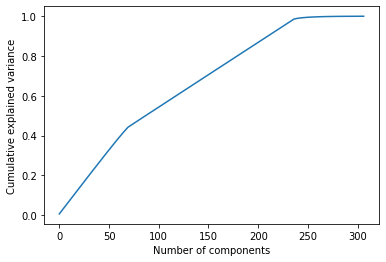

In [51]:
scree_plot(protein_peptide_df_pca)

## Integrated Dataset Analysis
After integrating proteins and peptides dataset we performed another screeplot analysis to see the optimal point of PCA. The reason being there are total 308 features in the dataset. We need to reduce the dimensions in order to get accurate results.

According to the scree plot analysis, the optimal values are 60 and 240.

In [52]:
protein_peptide_df_pca = pca_transform_dataset(60, protein_peptide_df_pca.iloc[:, 1:])

protein_peptide_df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60
0,3.117383e+07,1.244407e+07,7.168343e+06,-4.076137e+05,-2.357874e+07,1.166371e+06,-1.540021e+07,6.703624e+06,1.036276e+06,-3.453624e+06,...,3.536221e+05,9.464211e+04,9.180532e+04,-4.388028e+04,-8.206685e+05,9.261834e+05,8.677919e+04,-1.251997e+05,5.273935e+05,1.162713e+06
1,-5.603967e+06,-4.203983e+06,7.057184e+04,8.566347e+06,5.743791e+06,1.181585e+06,-8.374564e+06,-4.422534e+06,-4.186003e+06,2.613712e+06,...,8.258336e+05,2.756790e+05,-7.023164e+05,3.429902e+05,-1.492938e+06,1.449467e+05,-2.830772e+05,-2.542987e+06,9.882742e+05,3.113929e+06
2,-1.555263e+07,4.597698e+07,9.263603e+05,-2.028402e+06,1.081216e+06,3.221014e+06,3.749145e+06,2.367826e+06,4.489893e+06,6.911689e+05,...,-1.112117e+06,3.395404e+04,1.269124e+06,1.826185e+06,3.938240e+05,2.312195e+06,8.448901e+05,-4.266159e+05,-1.762847e+06,-1.619368e+05
3,-2.727157e+07,7.053394e+06,7.065565e+05,-8.604201e+06,-3.206076e+06,5.255443e+05,-1.463895e+06,-2.290135e+06,-1.633140e+06,-1.141667e+05,...,8.417508e+05,1.014626e+06,-5.024288e+04,8.905467e+03,4.692920e+05,-1.377615e+06,-1.664121e+06,1.782253e+05,1.023774e+06,-2.811615e+06
4,-7.731543e+06,-2.280642e+07,-6.947648e+06,-1.045260e+07,4.224923e+06,-1.172595e+05,-7.867432e+06,5.366954e+05,-7.777274e+05,3.645870e+06,...,-9.054372e+05,-2.178841e+05,1.894818e+06,-5.622069e+05,1.874367e+06,-1.437973e+06,-4.680174e+05,-1.607932e+05,4.379992e+04,-2.039655e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,-1.791713e+07,-6.462147e+06,5.042896e+06,-2.435366e+06,9.201854e+06,9.319751e+05,-1.043942e+07,-1.531971e+06,-4.517898e+06,-3.405308e+06,...,-1.636871e+06,-9.637449e+05,1.300947e+05,-1.792861e+05,-1.158374e+06,7.938910e+05,8.174515e+04,2.366179e+05,-1.499784e+06,-5.577945e+05
1109,1.725505e+07,1.841468e+07,1.153628e+07,4.614157e+06,1.226469e+06,2.976669e+06,1.445405e+06,1.319079e+06,2.086349e+06,-7.383768e+05,...,6.550361e+05,1.388030e+06,4.953912e+05,8.618544e+05,3.198932e+05,5.022066e+05,3.079093e+05,1.142591e+06,-9.305230e+05,-2.816941e+05
1110,-4.196729e+07,2.810590e+07,-5.746591e+06,-1.118373e+07,-1.366894e+06,6.249187e+06,2.080643e+06,-8.549924e+06,3.377732e+06,-4.100934e+06,...,6.758301e+04,6.643196e+05,-3.671171e+05,-4.899503e+04,1.557704e+06,1.292261e+06,1.126536e+06,1.890921e+05,-1.400459e+06,8.335734e+05
1111,-1.617950e+05,-4.464463e+06,-4.372304e+06,3.123334e+06,1.088903e+07,-2.636023e+06,-3.601060e+06,-3.056774e+06,2.889523e+06,-4.363570e+06,...,-4.398825e+05,1.800998e+06,4.369546e+05,3.893228e+05,-7.506564e+05,-3.292600e+05,-1.220267e+06,8.706899e+05,1.078607e+05,1.003297e+05


In [53]:
protein_peptide_df_pca = pd.concat([protein_peptide_df_pca, protein_df['visit_id']], axis= 1)

protein_peptide_df_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,visit_id
0,3.117383e+07,1.244407e+07,7.168343e+06,-4.076137e+05,-2.357874e+07,1.166371e+06,-1.540021e+07,6.703624e+06,1.036276e+06,-3.453624e+06,...,9.464211e+04,9.180532e+04,-4.388028e+04,-8.206685e+05,9.261834e+05,8.677919e+04,-1.251997e+05,5.273935e+05,1.162713e+06,55_0
1,-5.603967e+06,-4.203983e+06,7.057184e+04,8.566347e+06,5.743791e+06,1.181585e+06,-8.374564e+06,-4.422534e+06,-4.186003e+06,2.613712e+06,...,2.756790e+05,-7.023164e+05,3.429902e+05,-1.492938e+06,1.449467e+05,-2.830772e+05,-2.542987e+06,9.882742e+05,3.113929e+06,1517_0
2,-1.555263e+07,4.597698e+07,9.263603e+05,-2.028402e+06,1.081216e+06,3.221014e+06,3.749145e+06,2.367826e+06,4.489893e+06,6.911689e+05,...,3.395404e+04,1.269124e+06,1.826185e+06,3.938240e+05,2.312195e+06,8.448901e+05,-4.266159e+05,-1.762847e+06,-1.619368e+05,1923_0
3,-2.727157e+07,7.053394e+06,7.065565e+05,-8.604201e+06,-3.206076e+06,5.255443e+05,-1.463895e+06,-2.290135e+06,-1.633140e+06,-1.141667e+05,...,1.014626e+06,-5.024288e+04,8.905467e+03,4.692920e+05,-1.377615e+06,-1.664121e+06,1.782253e+05,1.023774e+06,-2.811615e+06,2660_0
4,-7.731543e+06,-2.280642e+07,-6.947648e+06,-1.045260e+07,4.224923e+06,-1.172595e+05,-7.867432e+06,5.366954e+05,-7.777274e+05,3.645870e+06,...,-2.178841e+05,1.894818e+06,-5.622069e+05,1.874367e+06,-1.437973e+06,-4.680174e+05,-1.607932e+05,4.379992e+04,-2.039655e+06,3636_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,-1.791713e+07,-6.462147e+06,5.042896e+06,-2.435366e+06,9.201854e+06,9.319751e+05,-1.043942e+07,-1.531971e+06,-4.517898e+06,-3.405308e+06,...,-9.637449e+05,1.300947e+05,-1.792861e+05,-1.158374e+06,7.938910e+05,8.174515e+04,2.366179e+05,-1.499784e+06,-5.577945e+05,58648_96
1109,1.725505e+07,1.841468e+07,1.153628e+07,4.614157e+06,1.226469e+06,2.976669e+06,1.445405e+06,1.319079e+06,2.086349e+06,-7.383768e+05,...,1.388030e+06,4.953912e+05,8.618544e+05,3.198932e+05,5.022066e+05,3.079093e+05,1.142591e+06,-9.305230e+05,-2.816941e+05,5645_108
1110,-4.196729e+07,2.810590e+07,-5.746591e+06,-1.118373e+07,-1.366894e+06,6.249187e+06,2.080643e+06,-8.549924e+06,3.377732e+06,-4.100934e+06,...,6.643196e+05,-3.671171e+05,-4.899503e+04,1.557704e+06,1.292261e+06,1.126536e+06,1.890921e+05,-1.400459e+06,8.335734e+05,12703_108
1111,-1.617950e+05,-4.464463e+06,-4.372304e+06,3.123334e+06,1.088903e+07,-2.636023e+06,-3.601060e+06,-3.056774e+06,2.889523e+06,-4.363570e+06,...,1.800998e+06,4.369546e+05,3.893228e+05,-7.506564e+05,-3.292600e+05,-1.220267e+06,8.706899e+05,1.078607e+05,1.003297e+05,55096_108


In [54]:
column_name = ['visit_id']

for i in range(1, 61):
    column_name.append('PC' + str(i))

protein_peptide_df_pca = protein_peptide_df_pca.loc[:, column_name]

protein_peptide_df_pca

,visit_id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60
0,55_0,3.117383e+07,1.244407e+07,7.168343e+06,-4.076137e+05,-2.357874e+07,1.166371e+06,-1.540021e+07,6.703624e+06,1.036276e+06,...,3.536221e+05,9.464211e+04,9.180532e+04,-4.388028e+04,-8.206685e+05,9.261834e+05,8.677919e+04,-1.251997e+05,5.273935e+05,1.162713e+06
1,1517_0,-5.603967e+06,-4.203983e+06,7.057184e+04,8.566347e+06,5.743791e+06,1.181585e+06,-8.374564e+06,-4.422534e+06,-4.186003e+06,...,8.258336e+05,2.756790e+05,-7.023164e+05,3.429902e+05,-1.492938e+06,1.449467e+05,-2.830772e+05,-2.542987e+06,9.882742e+05,3.113929e+06
2,1923_0,-1.555263e+07,4.597698e+07,9.263603e+05,-2.028402e+06,1.081216e+06,3.221014e+06,3.749145e+06,2.367826e+06,4.489893e+06,...,-1.112117e+06,3.395404e+04,1.269124e+06,1.826185e+06,3.938240e+05,2.312195e+06,8.448901e+05,-4.266159e+05,-1.762847e+06,-1.619368e+05
3,2660_0,-2.727157e+07,7.053394e+06,7.065565e+05,-8.604201e+06,-3.206076e+06,5.255443e+05,-1.463895e+06,-2.290135e+06,-1.633140e+06,...,8.417508e+05,1.014626e+06,-5.024288e+04,8.905467e+03,4.692920e+05,-1.377615e+06,-1.664121e+06,1.782253e+05,1.023774e+06,-2.811615e+06
4,3636_0,-7.731543e+06,-2.280642e+07,-6.947648e+06,-1.045260e+07,4.224923e+06,-1.172595e+05,-7.867432e+06,5.366954e+05,-7.777274e+05,...,-9.054372e+05,-2.178841e+05,1.894818e+06,-5.622069e+05,1.874367e+06,-1.437973e+06,-4.680174e+05,-1.607932e+05,4.379992e+04,-2.039655e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108,58648_96,-1.791713e+07,-6.462147e+06,5.042896e+06,-2.435366e+06,9.201854e+06,9.319751e+05,-1.043942e+07,-1.531971e+06,-4.517898e+06,...,-1.636871e+06,-9.637449e+05,1.300947e+05,-1.792861e+05,-1.158374e+06,7.938910e+05,8.174515e+04,2.366179e+05,-1.499784e+06,-5.577945e+05
1109,5645_108,1.725505e+07,1.841468e+07,1.153628e+07,4.614157e+06,1.226469e+06,2.976669e+06,1.445405e+06,1.319079e+06,2.086349e+06,...,6.550361e+05,1.388030e+06,4.953912e+05,8.618544e+05,3.198932e+05,5.022066e+05,3.079093e+05,1.142591e+06,-9.305230e+05,-2.816941e+05
1110,12703_108,-4.196729e+07,2.810590e+07,-5.746591e+06,-1.118373e+07,-1.366894e+06,6.249187e+06,2.080643e+06,-8.549924e+06,3.377732e+06,...,6.758301e+04,6.643196e+05,-3.671171e+05,-4.899503e+04,1.557704e+06,1.292261e+06,1.126536e+06,1.890921e+05,-1.400459e+06,8.335734e+05
1111,55096_108,-1.617950e+05,-4.464463e+06,-4.372304e+06,3.123334e+06,1.088903e+07,-2.636023e+06,-3.601060e+06,-3.056774e+06,2.889523e+06,...,-4.398825e+05,1.800998e+06,4.369546e+05,3.893228e+05,-7.506564e+05,-3.292600e+05,-1.220267e+06,8.706899e+05,1.078607e+05,1.003297e+05


In [55]:
patient = clinical_train[['visit_id', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']]

patient = pd.merge(protein_peptide_df_pca, patient, on= 'visit_id')

patient

,visit_id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC55,PC56,PC57,PC58,PC59,PC60,updrs_1,updrs_2,updrs_3,updrs_4
0,55_0,3.117383e+07,1.244407e+07,7.168343e+06,-4.076137e+05,-2.357874e+07,1.166371e+06,-1.540021e+07,6.703624e+06,1.036276e+06,...,-8.206685e+05,9.261834e+05,8.677919e+04,-1.251997e+05,5.273935e+05,1.162713e+06,10.0,6.0,15.0,NaN
1,1517_0,-5.603967e+06,-4.203983e+06,7.057184e+04,8.566347e+06,5.743791e+06,1.181585e+06,-8.374564e+06,-4.422534e+06,-4.186003e+06,...,-1.492938e+06,1.449467e+05,-2.830772e+05,-2.542987e+06,9.882742e+05,3.113929e+06,11.0,6.0,25.0,5.0
2,1923_0,-1.555263e+07,4.597698e+07,9.263603e+05,-2.028402e+06,1.081216e+06,3.221014e+06,3.749145e+06,2.367826e+06,4.489893e+06,...,3.938240e+05,2.312195e+06,8.448901e+05,-4.266159e+05,-1.762847e+06,-1.619368e+05,2.0,0.0,0.0,NaN
3,2660_0,-2.727157e+07,7.053394e+06,7.065565e+05,-8.604201e+06,-3.206076e+06,5.255443e+05,-1.463895e+06,-2.290135e+06,-1.633140e+06,...,4.692920e+05,-1.377615e+06,-1.664121e+06,1.782253e+05,1.023774e+06,-2.811615e+06,2.0,0.0,0.0,NaN
4,3636_0,-7.731543e+06,-2.280642e+07,-6.947648e+06,-1.045260e+07,4.224923e+06,-1.172595e+05,-7.867432e+06,5.366954e+05,-7.777274e+05,...,1.874367e+06,-1.437973e+06,-4.680174e+05,-1.607932e+05,4.379992e+04,-2.039655e+06,1.0,2.0,9.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,5645_96,7.480513e+06,2.067344e+07,8.020688e+06,6.670966e+06,-7.950932e+05,1.997716e+06,-3.834696e+06,3.018895e+06,3.408768e+06,...,6.581659e+05,1.195648e+06,-9.695537e+05,-4.235569e+05,-1.550143e+06,-1.061479e+06,19.0,15.0,22.0,4.0
1064,58648_96,-1.791713e+07,-6.462147e+06,5.042896e+06,-2.435366e+06,9.201854e+06,9.319751e+05,-1.043942e+07,-1.531971e+06,-4.517898e+06,...,-1.158374e+06,7.938910e+05,8.174515e+04,2.366179e+05,-1.499784e+06,-5.577945e+05,7.0,0.0,5.0,NaN
1065,5645_108,1.725505e+07,1.841468e+07,1.153628e+07,4.614157e+06,1.226469e+06,2.976669e+06,1.445405e+06,1.319079e+06,2.086349e+06,...,3.198932e+05,5.022066e+05,3.079093e+05,1.142591e+06,-9.305230e+05,-2.816941e+05,20.0,14.0,34.0,0.0
1066,55096_108,-1.617950e+05,-4.464463e+06,-4.372304e+06,3.123334e+06,1.088903e+07,-2.636023e+06,-3.601060e+06,-3.056774e+06,2.889523e+06,...,-7.506564e+05,-3.292600e+05,-1.220267e+06,8.706899e+05,1.078607e+05,1.003297e+05,5.0,6.0,46.0,0.0


In [56]:
patient.isnull().sum()

visit_id      0
PC1           0
PC2           0
PC3           0
PC4           0
           ... 
PC60          0
updrs_1       0
updrs_2       0
updrs_3      10
updrs_4     499
Length: 65, dtype: int64

In [57]:
cleaning(patient)

patient

,visit_id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC55,PC56,PC57,PC58,PC59,PC60,updrs_1,updrs_2,updrs_3,updrs_4
0,55_0,3.117383e+07,1.244407e+07,7.168343e+06,-4.076137e+05,-2.357874e+07,1.166371e+06,-1.540021e+07,6.703624e+06,1.036276e+06,...,-8.206685e+05,9.261834e+05,8.677919e+04,-1.251997e+05,5.273935e+05,1.162713e+06,10.0,6.0,15.0,2040454.0
1,1517_0,-5.603967e+06,-4.203983e+06,7.057184e+04,8.566347e+06,5.743791e+06,1.181585e+06,-8.374564e+06,-4.422534e+06,-4.186003e+06,...,-1.492938e+06,1.449467e+05,-2.830772e+05,-2.542987e+06,9.882742e+05,3.113929e+06,11.0,6.0,25.0,5.0
2,1923_0,-1.555263e+07,4.597698e+07,9.263603e+05,-2.028402e+06,1.081216e+06,3.221014e+06,3.749145e+06,2.367826e+06,4.489893e+06,...,3.938240e+05,2.312195e+06,8.448901e+05,-4.266159e+05,-1.762847e+06,-1.619368e+05,2.0,0.0,0.0,2040454.0
3,2660_0,-2.727157e+07,7.053394e+06,7.065565e+05,-8.604201e+06,-3.206076e+06,5.255443e+05,-1.463895e+06,-2.290135e+06,-1.633140e+06,...,4.692920e+05,-1.377615e+06,-1.664121e+06,1.782253e+05,1.023774e+06,-2.811615e+06,2.0,0.0,0.0,2040454.0
4,3636_0,-7.731543e+06,-2.280642e+07,-6.947648e+06,-1.045260e+07,4.224923e+06,-1.172595e+05,-7.867432e+06,5.366954e+05,-7.777274e+05,...,1.874367e+06,-1.437973e+06,-4.680174e+05,-1.607932e+05,4.379992e+04,-2.039655e+06,1.0,2.0,9.0,2040454.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,5645_96,7.480513e+06,2.067344e+07,8.020688e+06,6.670966e+06,-7.950932e+05,1.997716e+06,-3.834696e+06,3.018895e+06,3.408768e+06,...,6.581659e+05,1.195648e+06,-9.695537e+05,-4.235569e+05,-1.550143e+06,-1.061479e+06,19.0,15.0,22.0,4.0
1064,58648_96,-1.791713e+07,-6.462147e+06,5.042896e+06,-2.435366e+06,9.201854e+06,9.319751e+05,-1.043942e+07,-1.531971e+06,-4.517898e+06,...,-1.158374e+06,7.938910e+05,8.174515e+04,2.366179e+05,-1.499784e+06,-5.577945e+05,7.0,0.0,5.0,2040454.0
1065,5645_108,1.725505e+07,1.841468e+07,1.153628e+07,4.614157e+06,1.226469e+06,2.976669e+06,1.445405e+06,1.319079e+06,2.086349e+06,...,3.198932e+05,5.022066e+05,3.079093e+05,1.142591e+06,-9.305230e+05,-2.816941e+05,20.0,14.0,34.0,0.0
1066,55096_108,-1.617950e+05,-4.464463e+06,-4.372304e+06,3.123334e+06,1.088903e+07,-2.636023e+06,-3.601060e+06,-3.056774e+06,2.889523e+06,...,-7.506564e+05,-3.292600e+05,-1.220267e+06,8.706899e+05,1.078607e+05,1.003297e+05,5.0,6.0,46.0,0.0


In [58]:
patient.isnull().sum()

visit_id    0
PC1         0
PC2         0
PC3         0
PC4         0
           ..
PC60        0
updrs_1     0
updrs_2     0
updrs_3     0
updrs_4     0
Length: 65, dtype: int64

In [59]:
patient_i_dict = {'patient_id': [],
                  'visit_month': []}
for visit_id in patient['visit_id']:
    visit_id_list = visit_id.split('_')
    
    patient_i_dict['patient_id'].append(visit_id_list[0])
    patient_i_dict['visit_month'].append(visit_id_list[1])
    
id_df = pd.DataFrame(patient_i_dict)

id_df

,patient_id,visit_month
0,55,0
1,1517,0
2,1923,0
3,2660,0
4,3636,0
...,...,...
1063,5645,96
1064,58648,96
1065,5645,108
1066,55096,108


In [60]:
patient = pd.concat([id_df, patient], axis= 1)
patient['patient_id'] = patient['patient_id'].astype(int)
patient['visit_month'] = patient['visit_month'].astype(int)

patient

,patient_id,visit_month,visit_id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,...,PC55,PC56,PC57,PC58,PC59,PC60,updrs_1,updrs_2,updrs_3,updrs_4
0,55,0,55_0,3.117383e+07,1.244407e+07,7.168343e+06,-4.076137e+05,-2.357874e+07,1.166371e+06,-1.540021e+07,...,-8.206685e+05,9.261834e+05,8.677919e+04,-1.251997e+05,5.273935e+05,1.162713e+06,10.0,6.0,15.0,2040454.0
1,1517,0,1517_0,-5.603967e+06,-4.203983e+06,7.057184e+04,8.566347e+06,5.743791e+06,1.181585e+06,-8.374564e+06,...,-1.492938e+06,1.449467e+05,-2.830772e+05,-2.542987e+06,9.882742e+05,3.113929e+06,11.0,6.0,25.0,5.0
2,1923,0,1923_0,-1.555263e+07,4.597698e+07,9.263603e+05,-2.028402e+06,1.081216e+06,3.221014e+06,3.749145e+06,...,3.938240e+05,2.312195e+06,8.448901e+05,-4.266159e+05,-1.762847e+06,-1.619368e+05,2.0,0.0,0.0,2040454.0
3,2660,0,2660_0,-2.727157e+07,7.053394e+06,7.065565e+05,-8.604201e+06,-3.206076e+06,5.255443e+05,-1.463895e+06,...,4.692920e+05,-1.377615e+06,-1.664121e+06,1.782253e+05,1.023774e+06,-2.811615e+06,2.0,0.0,0.0,2040454.0
4,3636,0,3636_0,-7.731543e+06,-2.280642e+07,-6.947648e+06,-1.045260e+07,4.224923e+06,-1.172595e+05,-7.867432e+06,...,1.874367e+06,-1.437973e+06,-4.680174e+05,-1.607932e+05,4.379992e+04,-2.039655e+06,1.0,2.0,9.0,2040454.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,5645,96,5645_96,7.480513e+06,2.067344e+07,8.020688e+06,6.670966e+06,-7.950932e+05,1.997716e+06,-3.834696e+06,...,6.581659e+05,1.195648e+06,-9.695537e+05,-4.235569e+05,-1.550143e+06,-1.061479e+06,19.0,15.0,22.0,4.0
1064,58648,96,58648_96,-1.791713e+07,-6.462147e+06,5.042896e+06,-2.435366e+06,9.201854e+06,9.319751e+05,-1.043942e+07,...,-1.158374e+06,7.938910e+05,8.174515e+04,2.366179e+05,-1.499784e+06,-5.577945e+05,7.0,0.0,5.0,2040454.0
1065,5645,108,5645_108,1.725505e+07,1.841468e+07,1.153628e+07,4.614157e+06,1.226469e+06,2.976669e+06,1.445405e+06,...,3.198932e+05,5.022066e+05,3.079093e+05,1.142591e+06,-9.305230e+05,-2.816941e+05,20.0,14.0,34.0,0.0
1066,55096,108,55096_108,-1.617950e+05,-4.464463e+06,-4.372304e+06,3.123334e+06,1.088903e+07,-2.636023e+06,-3.601060e+06,...,-7.506564e+05,-3.292600e+05,-1.220267e+06,8.706899e+05,1.078607e+05,1.003297e+05,5.0,6.0,46.0,0.0


In [61]:
patient.drop('visit_id', axis= 1, inplace= True)

In [62]:
patient.dtypes

patient_id       int64
visit_month      int64
PC1            float64
PC2            float64
PC3            float64
                ...   
PC60           float64
updrs_1        float64
updrs_2        float64
updrs_3        float64
updrs_4        float64
Length: 66, dtype: object

## Training and Testing split

In [63]:
from sklearn.model_selection import train_test_split

X = patient.iloc[:, :62]
y = patient.iloc[:, 62: 66]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.375)

## Scaling

In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Performance Curve

In [65]:
def performance_curve(model):
    history = model.history
    fig, ax = plt.subplots(nrows= 1, ncols= 2, figsize=(10,5))

    ax[0].plot(history.epoch, history.history['accuracy'], label= 'Train')
    ax[0].plot(history.epoch, history.history['val_accuracy'], label= 'Test')
    ax[0].legend(loc = 'lower right')
    ax[0].set_title('Accuracy Curve')

    ax[1].plot(history.epoch, history.history['loss'], label= 'Train')
    ax[1].plot(history.epoch, history.history['val_loss'], label= 'Test')
    ax[1].legend(loc= 'upper right')
    ax[1].set_title('Loss Curve')

    plt.show()

## Model Implementation

In [ ]:
model = tf.keras.Sequential()

#model.add(tf.keras.layers.Dense(units= 1024, activation= 'elu'))
model.add(tf.keras.layers.Dense(units= 1024, activation= 'elu'))
model.add(tf.keras.layers.Dense(units= 512, activation= 'elu', kernel_regularizer= tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dense(units= 256, activation= 'elu', kernel_regularizer= tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dense(units= 128, activation= 'elu', kernel_regularizer= tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.Dense(units= 64, activation= 'tanh', kernel_regularizer= tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.Dense(units= 32, activation= 'tanh', kernel_regularizer= tf.keras.regularizers.l2(0.001)))
model.add(tf.keras.layers.Dense(units= 16, activation= 'relu', kernel_regularizer= tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.Dense(units= 8, activation= 'relu'))
model.add(tf.keras.layers.Dense(units= 4, activation= 'linear'))

model.compile(optimizer= 'adam', loss= tf.keras.losses.LogCosh(), metrics= ['accuracy'])

model.fit(X_train, y_train, batch_size= 10, epochs= 300, validation_data= (X_test, y_test))

Epoch 1/300
67/67 [==============================] - 2s 26ms/step - loss: 243211.5312 - accuracy: 0.3868 - val_loss: 242979.4844 - val_accuracy: 0.4389
Epoch 2/300
67/67 [==============================] - 1s 21ms/step - loss: 243209.1875 - accuracy: 0.4213 - val_loss: 242978.0312 - val_accuracy: 0.4863
Epoch 3/300
67/67 [==============================] - 1s 20ms/step - loss: 243208.1875 - accuracy: 0.5247 - val_loss: 242977.3906 - val_accuracy: 0.5387
Epoch 4/300
67/67 [==============================] - 1s 20ms/step - loss: 243207.9219 - accuracy: 0.4888 - val_loss: 242977.0312 - val_accuracy: 0.4688
Epoch 5/300
67/67 [==============================] - 1s 20ms/step - loss: 243207.6562 - accuracy: 0.5082 - val_loss: 242977.0781 - val_accuracy: 0.4913
Epoch 6/300
67/67 [==============================] - 1s 20ms/step - loss: 243207.5312 - accuracy: 0.5037 - val_loss: 242976.9219 - val_accuracy: 0.4688
Epoch 7/300
67/67 [==============================] - 1s 21ms/step - loss: 243207.3438 - 

67/67 [==============================] - 1s 19ms/step - loss: 240885.1406 - accuracy: 0.5967 - val_loss: 241222.3594 - val_accuracy: 0.5761
Epoch 108/300
67/67 [==============================] - 1s 19ms/step - loss: 240826.0938 - accuracy: 0.5967 - val_loss: 241172.1719 - val_accuracy: 0.5761
Epoch 109/300
67/67 [==============================] - 1s 19ms/step - loss: 240759.8906 - accuracy: 0.5967 - val_loss: 241119.7812 - val_accuracy: 0.5761
Epoch 110/300
67/67 [==============================] - 1s 19ms/step - loss: 240692.3438 - accuracy: 0.5967 - val_loss: 241075.5938 - val_accuracy: 0.5761
Epoch 111/300
67/67 [==============================] - 1s 19ms/step - loss: 240626.8594 - accuracy: 0.5967 - val_loss: 241026.5312 - val_accuracy: 0.5761
Epoch 112/300
67/67 [==============================] - 1s 19ms/step - loss: 240559.8281 - accuracy: 0.5967 - val_loss: 240973.4844 - val_accuracy: 0.5761
Epoch 113/300
67/67 [==============================] - 1s 19ms/step - loss: 240490.1719 - 

67/67 [==============================] - 1s 19ms/step - loss: 223355.2188 - accuracy: 0.6117 - val_loss: 230518.1250 - val_accuracy: 0.5736
Epoch 214/300
67/67 [==============================] - 1s 20ms/step - loss: 223081.2812 - accuracy: 0.6117 - val_loss: 230340.3438 - val_accuracy: 0.5736
Epoch 215/300
67/67 [==============================] - 1s 19ms/step - loss: 222802.8125 - accuracy: 0.6117 - val_loss: 230181.5312 - val_accuracy: 0.5736
Epoch 216/300
67/67 [==============================] - 1s 19ms/step - loss: 222522.2188 - accuracy: 0.6117 - val_loss: 230013.0625 - val_accuracy: 0.5736
Epoch 217/300
67/67 [==============================] - 1s 20ms/step - loss: 222243.3281 - accuracy: 0.6117 - val_loss: 229840.3594 - val_accuracy: 0.5736
Epoch 218/300
67/67 [==============================] - 1s 19ms/step - loss: 221963.4844 - accuracy: 0.6117 - val_loss: 229642.9688 - val_accuracy: 0.5736
Epoch 219/300
67/67 [==============================] - 1s 19ms/step - loss: 221666.8750 - 

## Performance

In [ ]:
performance_curve(model)

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(test_accuracy)